In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img = cv2.imread('../input/images/dog.jpg')

In [15]:
rows, cols = img.shape[:2]

In [16]:
img.shape[:2], img.shape

((400, 401), (400, 401, 3))

In [17]:
rows, cols

(400, 401)

In [18]:
# create a grid
gridx, gridy = np.meshgrid(np.arange(cols), np.arange(rows))

In [19]:
gridy

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [397, 397, 397, ..., 397, 397, 397],
       [398, 398, 398, ..., 398, 398, 398],
       [399, 399, 399, ..., 399, 399, 399]], shape=(400, 401))

In [20]:
# define the mapping rule

mapx = gridx
mapy = gridy + 15 * np.sin(gridx/20) # random formula sign is important

In [21]:
mapx = mapx.astype(np.float32)
mapy = mapy.astype(np.float32)

In [22]:
mapped_img = cv2.remap(img, mapx, mapy, interpolation=cv2.INTER_LINEAR)

In [23]:
mapped_img = cv2.cvtColor(mapped_img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

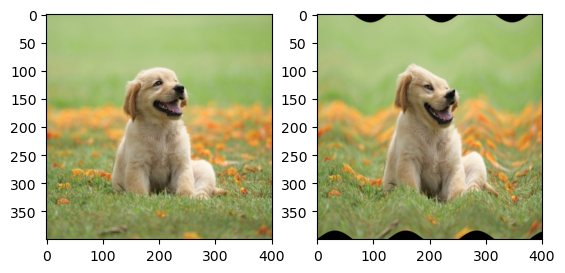

In [25]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mapped_img)

# MIS MATCHING

In [ ]:
# pip install opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


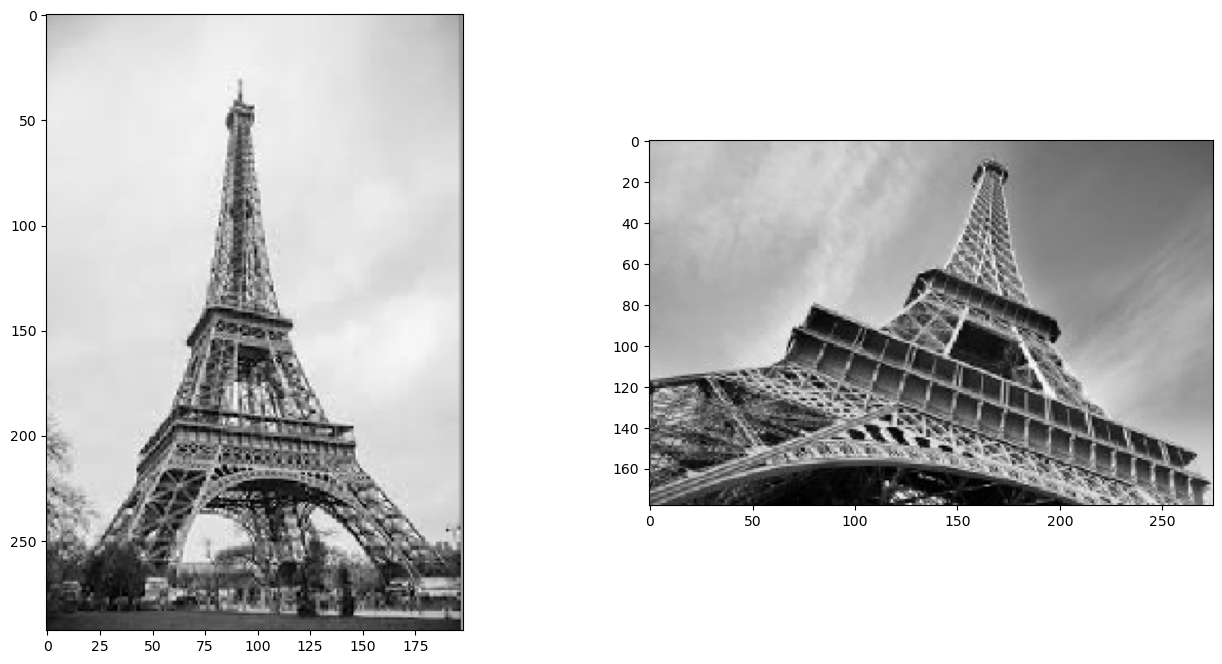

In [30]:
img1 = cv2.imread('../input/images/eiphel1.png',0)
img2 = cv2.imread('../input/images/eiphel2.png',0)

figure, ax = plt.subplots(1,2,figsize=(16,8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [31]:
sift = cv2.SIFT_create()


In [32]:
keypoints_1, description_1 = sift.detectAndCompute(img1, None)
keypoints_2, description_2 = sift.detectAndCompute(img2, None)

In [34]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(description_1,description_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:20], img2, flags=2)

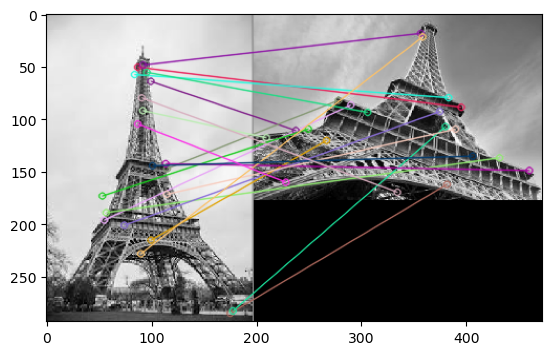

(<matplotlib.image.AxesImage at 0x1b2b2b1ce00>, None)

In [35]:
plt.imshow(img3), plt.show()